# Рекомендательные системы. Введение

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df_ratings = pd.read_csv("ratings.csv")
df_movies = pd.read_csv("movies.csv")

## Анализ данных.

In [47]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [50]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [51]:
# для удобства объединим в одну таблицу.

df_ratings = df_ratings.merge(df_movies[['movieId', 'title']],how='left', on='movieId')

In [52]:
df_ratings.groupby('rating').count()

,userId,movieId,timestamp,title
rating,,,,
0.5,1370,1370,1370,1370
1.0,2811,2811,2811,2811
1.5,1791,1791,1791,1791
2.0,7551,7551,7551,7551
2.5,5550,5550,5550,5550
3.0,20047,20047,20047,20047
3.5,13136,13136,13136,13136
4.0,26818,26818,26818,26818
4.5,8551,8551,8551,8551


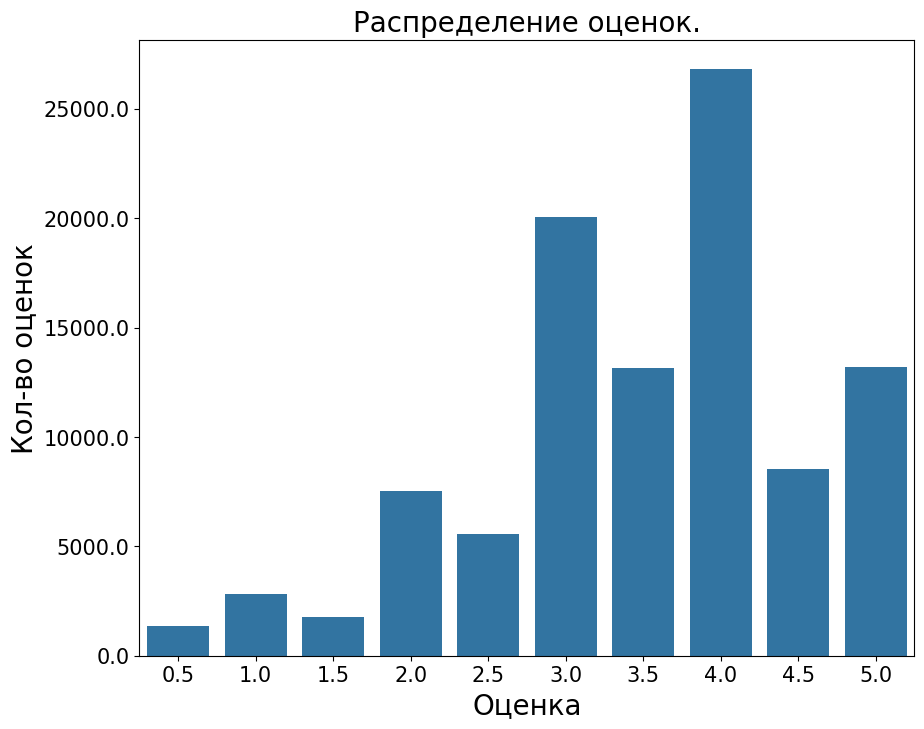

In [53]:
# посмотрим на распределение оценок фильмов.

plt.figure(figsize = (10, 8))
ax = sns.countplot(x="rating", data=df_ratings)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Распределение оценок.", fontsize = 20)
plt.xlabel("Оценка", fontsize = 20)
plt.ylabel("Кол-во оценок", fontsize = 20)
plt.show()

Самые часто встречаемые оценки - это 3 и 4, что неудивительно т.к. шедевров, которые всем нравятся сравнительно меньше, чем средних фильмов, как и откровенно плохих фильмов значительно меньше(либо их нет в датасете).

In [54]:
df_ratings.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

In [55]:
df_ratings.groupby(by = "title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

## Посмотроим самую простую матрицу пользователь-фильм.

Две вещи, на которые стоить обратить внимание:
- это разреженная матрица: большинство данных для каждого пользователя - NaN(у фильма нет оценки пользователя).
- это очень широкая матрица, в нашем случае это ~10 000 столбцов.

In [56]:
df_user_item = df_ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

In [57]:
df_user_item.tail(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [58]:
df_user_item.shape

(610, 9719)

Эта матрица очень тяжелая для обработки в памяти. Вернусь к ней позже.

In [59]:
from scipy import sparse

## Нахождение рекомендация для пользователя.

Для начала возьмем фильм "Форест Гамп" и найдем похожие на него исходя из оценок одного пользователя.

In [60]:
forrestGumpRatings = df_user_item['Forrest Gump (1994)']

In [61]:
forrestGumpRatings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [62]:
similarMovies = df_user_item.corrwith(forrestGumpRatings).dropna()

In [63]:
similarMovies

title
'burbs, The (1989)                0.197712
(500) Days of Summer (2009)       0.234095
*batteries not included (1987)    0.892710
...And Justice for All (1979)     0.928571
10 Cent Pistol (2015)            -1.000000
                                    ...   
[REC]² (2009)                    -0.052414
eXistenZ (1999)                   0.011189
xXx (2002)                        0.306817
xXx: State of the Union (2005)    0.383482
¡Three Amigos! (1986)             0.449692
Length: 5460, dtype: float64

In [77]:
# выведем первые 15 похожих фильмов.

similarMovies.sort_values(ascending=False)[:15]

title
Lost & Found (1999)                                   1.0
Century of the Self, The (2002)                       1.0
The 5th Wave (2016)                                   1.0
Play Time (a.k.a. Playtime) (1967)                    1.0
Memories (Memorîzu) (1995)                            1.0
Playing God (1997)                                    1.0
Killers (2010)                                        1.0
Girl Walks Home Alone at Night, A (2014)              1.0
Tampopo (1985)                                        1.0
Cercle Rouge, Le (Red Circle, The) (1970)             1.0
The Boss (2016)                                       1.0
Poison Ivy: New Seduction (1997)                      1.0
Tale of Two Sisters, A (Janghwa, Hongryeon) (2003)    1.0
Welcome to the Jungle (2013)                          1.0
Take Shelter (2011)                                   1.0
dtype: float64

Сначала построим матрицу сходства - мы увидим, какие фильмы похожи по рейтингам пользователя.

In [78]:
corr_matrix = df_user_item.corr(method='pearson', min_periods=100)

In [81]:
corr_matrix.head(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сделаем рекомендацию для пользователя. В данном случае возьмем пользователя с id = 1.

In [108]:
user_ratings = df_user_item.loc[1].dropna()
user_ratings

title
13th Warrior, The (1999)                4.0
20 Dates (1998)                         4.0
Abyss, The (1989)                       4.0
Adventures of Robin Hood, The (1938)    5.0
Alice in Wonderland (1951)              5.0
                                       ... 
Wolf Man, The (1941)                    5.0
X-Men (2000)                            5.0
Young Frankenstein (1974)               5.0
Young Sherlock Holmes (1985)            3.0
¡Three Amigos! (1986)                   4.0
Name: 1, Length: 232, dtype: float64

In [109]:
simCandidates = pd.Series()
for i in range(0, len(user_ratings.index)):                 # Идем по списку всех фильмов оцененных пользвателем
    sims = corr_matrix[user_ratings.index[i]].dropna()      # Извлекаем фильмы, похожие на оцененные пользователем с id=1
    sims = sims.map(lambda x: x * user_ratings[i])          # Умножаем корреляцию на оценку пользователя по фильму
    simCandidates = simCandidates._append(sims)             # Добавляем индекс в список сравниваемых кандидатов
simCandidates.sort_values(inplace = True, ascending = False)

In [115]:
simCandidates

X-Men (2000)                                 5.000000
Monty Python and the Holy Grail (1975)       5.000000
Indiana Jones and the Last Crusade (1989)    5.000000
Green Mile, The (1999)                       5.000000
Goodfellas (1990)                            5.000000
                                               ...   
Fargo (1996)                                -0.534097
Pulp Fiction (1994)                         -0.539280
Mission: Impossible (1996)                  -0.539280
Pulp Fiction (1994)                         -0.803724
Independence Day (a.k.a. ID4) (1996)        -0.890162
Length: 891, dtype: float64

In [119]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending = False)

Посмотрим топ-5, которые можно рекомендовать пользователю.

In [122]:
simCandidates.head(5)

Matrix, The (1999)                                       42.818750
Star Wars: Episode V - The Empire Strikes Back (1980)    41.979806
Star Wars: Episode IV - A New Hope (1977)                38.948199
Forrest Gump (1994)                                      36.244152
Jurassic Park (1993)                                     35.161149
dtype: float64

Для рекомендации нам нужны фильмы, которые пользователь не смотрел(у них нет оценки), поэтому найдем подходящие нам фильмы из списка выше, которые пользователь еще не видел.

In [125]:
intersection_set = set.intersection(set(simCandidates.index), set(user_ratings.index))
not_watched = list(set(simCandidates.index) - set(user_ratings.index))

In [126]:
print("Intersection: ", len(intersection_set))
print("Not watched: ", len(not_watched))

Intersection:  57
Not watched:  42


In [127]:
filteredSims = simCandidates[not_watched].sort_values(ascending = False)

In [130]:
filteredSims.head(5)

Terminator 2: Judgment Day (1991)                34.185307
Shawshank Redemption, The (1994)                 25.529866
Godfather, The (1972)                            20.061134
Sixth Sense, The (1999)                          15.341456
Lord of the Rings: The Two Towers, The (2002)    13.045573
dtype: float64

Выше выеден топ-5 фильмов, для рекомедации пользователю исходя из уже оценненых им фильмов. Данный метод не работает для новых пользователей, которые еще не поставили оценок какому-либо фильму. 